In [1]:
# Importando imagens

!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-10-26 13:07:02--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 2607:f8b0:4023:c0b::80, 2607:f8b0:4023:c0d::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  92.2MB/s    in 0.7s    

2022-10-26 13:07:03 (92.2 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
!unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

In [3]:
!rm - rf cats_and_dogs_filtered.zip

rm: cannot remove '-': No such file or directory
rm: cannot remove 'rf': No such file or directory


In [4]:
# importando bibliotecas

import os
import matplotlib.pyplot as plt
import tensorflow as tf


In [6]:
#Verificando quantidade de imagens para train e validation

dataset_dir = os.path.join(os.getcwd(), 'cats_and_dogs_filtered')

dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_train_cats_len = len(os.listdir(os.path.join(dataset_train_dir, 'cats')))
dataset_train_dogs_len = len(os.listdir(os.path.join(dataset_train_dir, 'dogs')))

dataset_validation_dir = os.path.join(dataset_dir, 'validation')
dataset_validation_cats_len = len(os.listdir(os.path.join(dataset_validation_dir, 'cats')))
dataset_validation_dogs_len = len(os.listdir(os.path.join(dataset_validation_dir, 'dogs')))

print('Train Cats: %s' % dataset_train_cats_len)
print('Train Dogs: %s' % dataset_train_dogs_len)
print('Validation Cats: %s' % dataset_validation_cats_len)
print('Validation Dogs: %s' % dataset_validation_dogs_len)


Train Cats: 1000
Train Dogs: 1000
Validation Cats: 500
Validation Dogs: 500


In [7]:
# Pré processando as imagens

image_width = 160
image_height = 160
image_color_channel = 3
image_color_channel_size = 255
image_size = (image_width, image_height)
image_shape = image_size + (image_color_channel,)

batch_size = 32
epochs = 20
learning_rate = 0.0001

class_names = ['cat', 'dog']


In [8]:
# Criando objetos do dataset

dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 2000 files belonging to 2 classes.


In [9]:
# Criando dataset de validação

dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_validation_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 1000 files belonging to 2 classes.


In [10]:
# Criando dataset test

dataset_validation_cardinality = tf.data.experimental.cardinality(dataset_validation)
dataset_validation_batches = dataset_validation_cardinality // 5

dataset_test= dataset_validation.take(dataset_validation_batches)
dataset_validation = dataset_validation.skip(dataset_validation_batches)

print("Validation Dataset Cardinality: %d" % tf.data.experimental.cardinality(dataset_validation))
print("Test Dataset Cardinality: %d" % tf.data.experimental.cardinality(dataset_test))

Validation Dataset Cardinality: 26
Test Dataset Cardinality: 6


In [11]:
def plot_dataset(dataset):

  plt.gcf().clear()
  plt.figure(figsize = (15, 15))

  for features, labels in dataset.take(1):

    for i in range(9):

      plt.subplot(3, 3, i + 1)
      plt.axis("off")

      plt.imshow(features[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])

<Figure size 432x288 with 0 Axes>

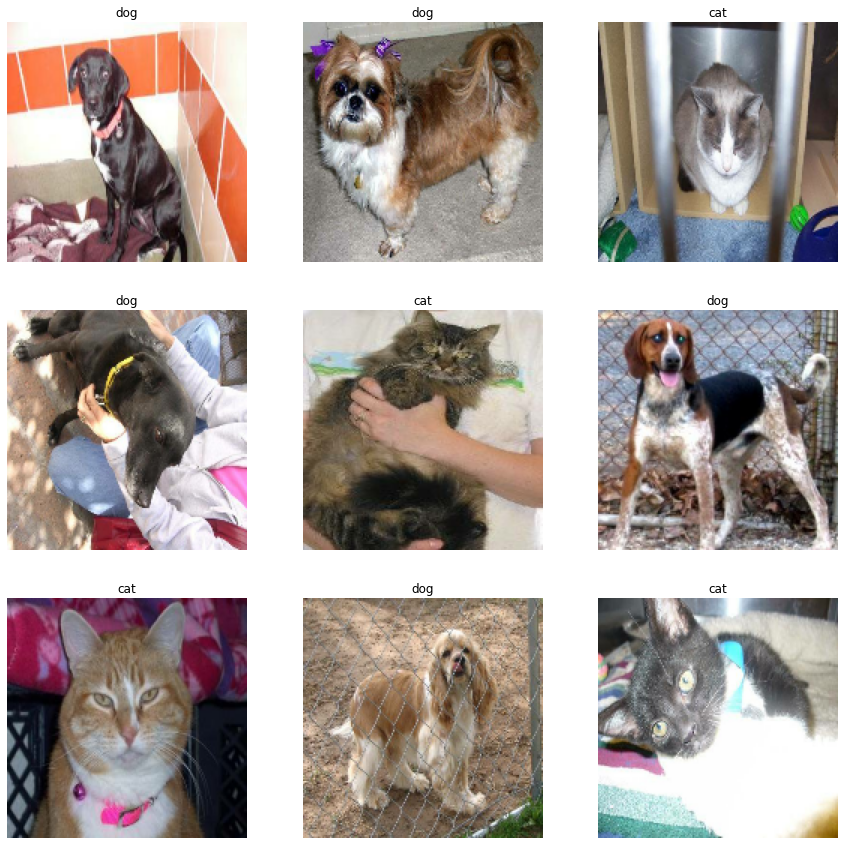

In [13]:
plot_dataset(dataset_train)

<Figure size 432x288 with 0 Axes>

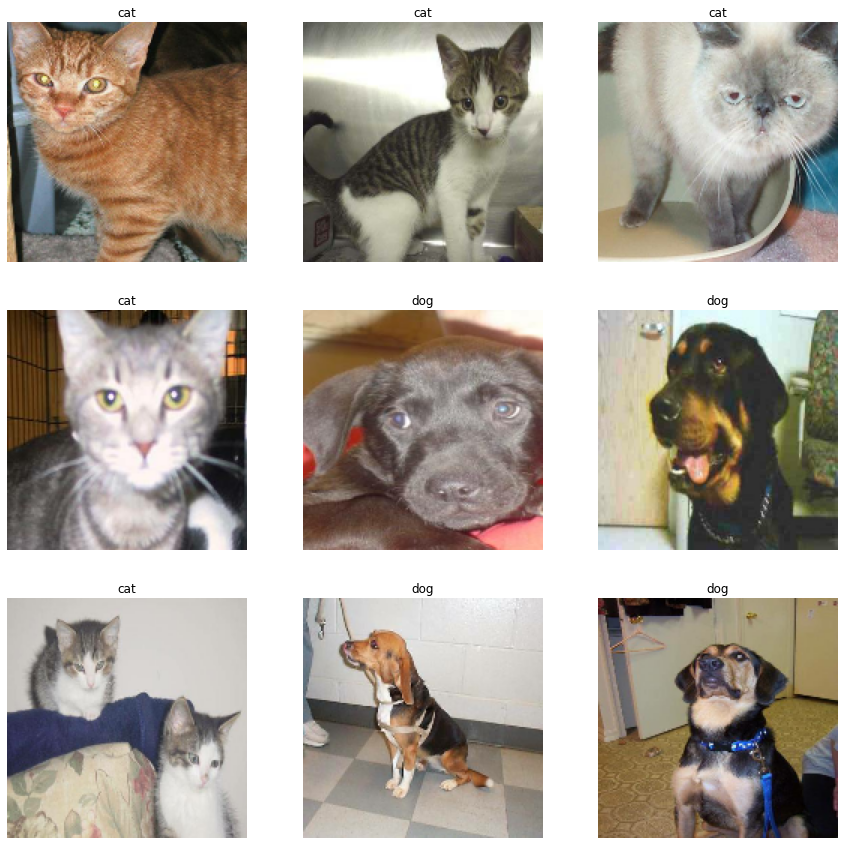

In [14]:
plot_dataset(dataset_validation)

<Figure size 432x288 with 0 Axes>

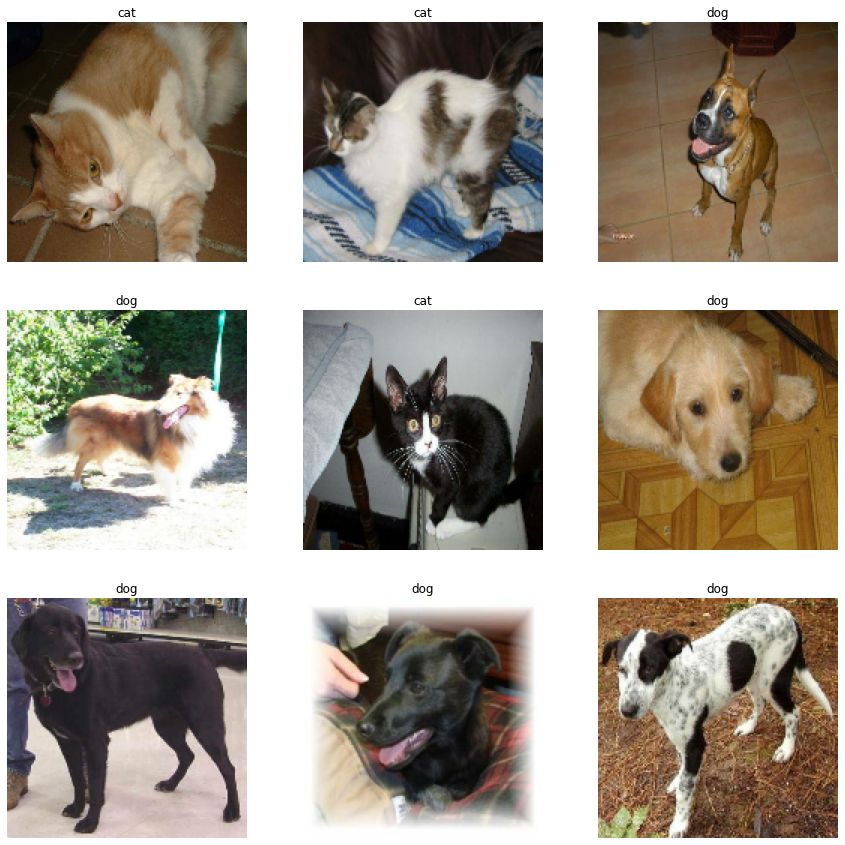

In [15]:
plot_dataset(dataset_test)

In [29]:
data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
])

In [36]:
def plot_dataset_data_augmentation(dataset):

  plt.gcf().clear()
  plt.figure(figsize = (15, 15))

  for features, _ in dataset.take(1):

    feature = features[0]

    for i in range(9):

      feature_data_augmentation = data_augmentation(tf.expand_dims(feature, 0))

      plt.subplot(3, 3, i + 1)
      plt.axis("off")

      plt.imshow(feature_data_augmentation[0] / image_color_channel_size)


<Figure size 432x288 with 0 Axes>

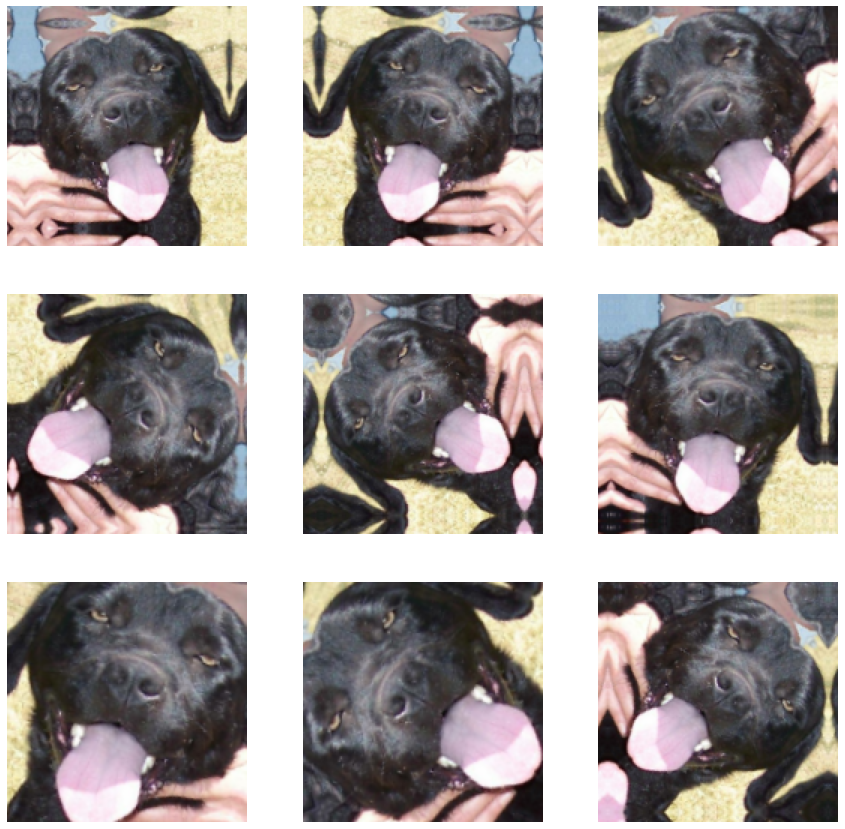

In [37]:
plot_dataset_data_augmentation(dataset_train)

In [39]:
# Aplicação de Transfer Learning

model_transfer_learning = tf.keras.applications.MobileNetV2(
    input_shape = image_shape,
    include_top = False,
    weights = 'imagenet'
)

model_transfer_learning.trainable = False

model_transfer_learning.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReL

In [41]:
# criando modelo

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(
        1. / (image_color_channel_size / 2),
        offset = -1,
        input_shape = image_shape
    ),
    data_augmentation,
    model_transfer_learning,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ["accuracy"]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 sequential_4 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_6 (Dense)             (None, 1)                

In [42]:
# Avanço do treinamento

history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = epochs
)

Epoch 1/20
63/63 [==============================] - 57s 837ms/step - loss: 0.7272 - accuracy: 0.5680 - val_loss: 0.5434 - val_accuracy: 0.7376
Epoch 2/20
63/63 [==============================] - 54s 849ms/step - loss: 0.5338 - accuracy: 0.7465 - val_loss: 0.3940 - val_accuracy: 0.8812
Epoch 3/20
63/63 [==============================] - 54s 858ms/step - loss: 0.4360 - accuracy: 0.8190 - val_loss: 0.3084 - val_accuracy: 0.9245
Epoch 4/20
63/63 [==============================] - 53s 846ms/step - loss: 0.3718 - accuracy: 0.8485 - val_loss: 0.2440 - val_accuracy: 0.9480
Epoch 5/20
63/63 [==============================] - 54s 849ms/step - loss: 0.3117 - accuracy: 0.8915 - val_loss: 0.2049 - val_accuracy: 0.9579
Epoch 6/20
63/63 [==============================] - 56s 888ms/step - loss: 0.2902 - accuracy: 0.8905 - val_loss: 0.1825 - val_accuracy: 0.9567
Epoch 7/20
63/63 [==============================] - 55s 876ms/step - loss: 0.2623 - accuracy: 0.9065 - val_loss: 0.1606 - val_accuracy: 0.9653

In [43]:
def plot_model():

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  epochs_range = range(epochs)

  plt.gcf().clear()
  plt.figure(figsize = (15, 8))

  plt.subplot(1, 2, 1)
  plt.title("Training and validation Accuracy")
  plt.plot(epochs_range, accuracy, label = "Training Accuracy")
  plt.plot(epochs_range, val_accuracy, label = "Validation Accuracy")
  plt.legend(loc = "lower right")

  plt.subplot(1, 2, 2)
  plt.title("Training and Validation loss")
  plt.plot(epochs_range, loss, label = "Training Loss")
  plt.plot(epochs_range, val_loss, label = "Validation Loss")
  plt.legend(loc = "lower right")

  plt.show()

<Figure size 432x288 with 0 Axes>

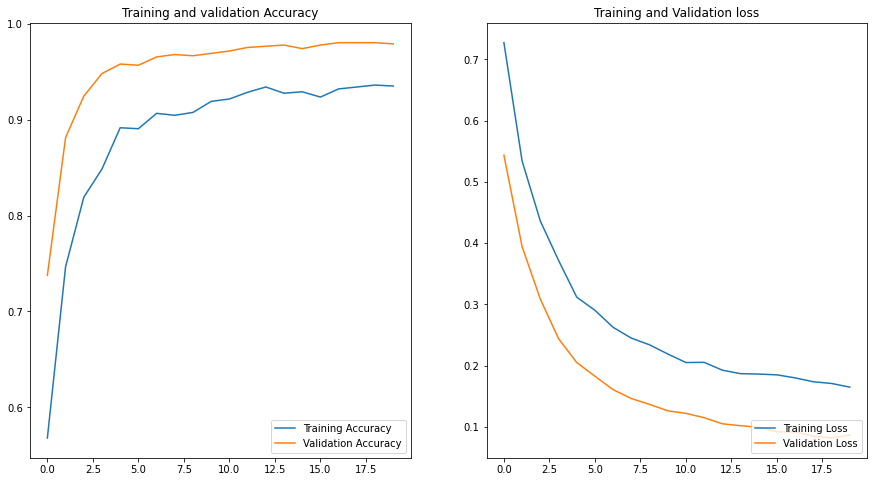

In [44]:
plot_model()

In [21]:
# Verificando como o modelo se comporta em um dataset de test

def plot_dataset_predictions(dataset):

  features, labels = dataset.as_numpy_iterator().next()

  predictions = model.predict_on_batch(features).flatten()
  predictions = tf.where(predictions <0.5, 0, 1 )

  print("Labels:       %s" % labels)
  print("Predictions: %s" % predictions.numpy())

  plt.gcf().clear()
  plt.figure(figsize = (15, 15))

  for i in range(9):

    plt.subplot(3, 3, i + 1)
    plt.axis("off")

    plt.imshow(features[i].astype("uint8"))
    plt.title(class_names[predictions[i]])


Labels:       [0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1]
Predictions: [0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1]


<Figure size 432x288 with 0 Axes>

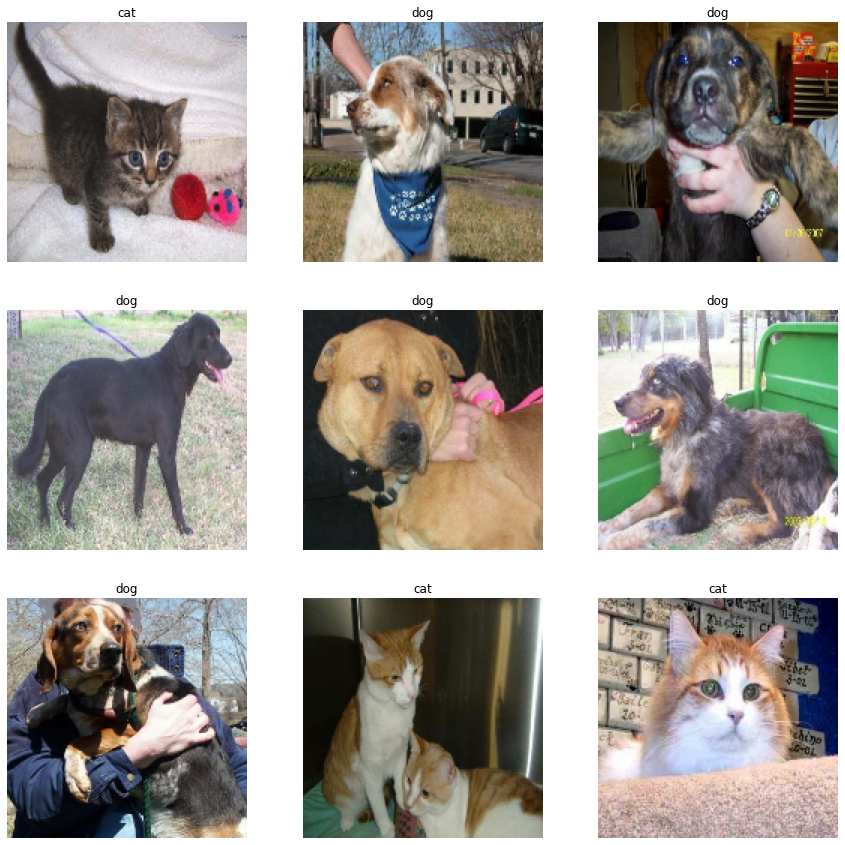

In [45]:
plot_dataset_predictions(dataset_test)